# Import thư viện

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


# 1. ĐỌC DỮ LIỆU

In [4]:
df = pd.read_csv("../etl/datasets/movie_features.csv")


# 2. TẠO DỮ LIỆU MỚI - CHỈ LẤY CỘT THUỘC TÍNH (NUMERIC)

In [5]:
X = df.select_dtypes(include=np.number).drop(columns=['tmdbId']).copy()


# 3. CHUẨN HÓA DỮ LIỆU (STANDARDIZATION)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 4. GIẢM CHIỀU DỮ LIỆU - PCA (2D)

In [7]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)


# 5. VẼ SCATTER PLOT 2D THEO NHÃN

NameError: name 'output_dir' is not defined

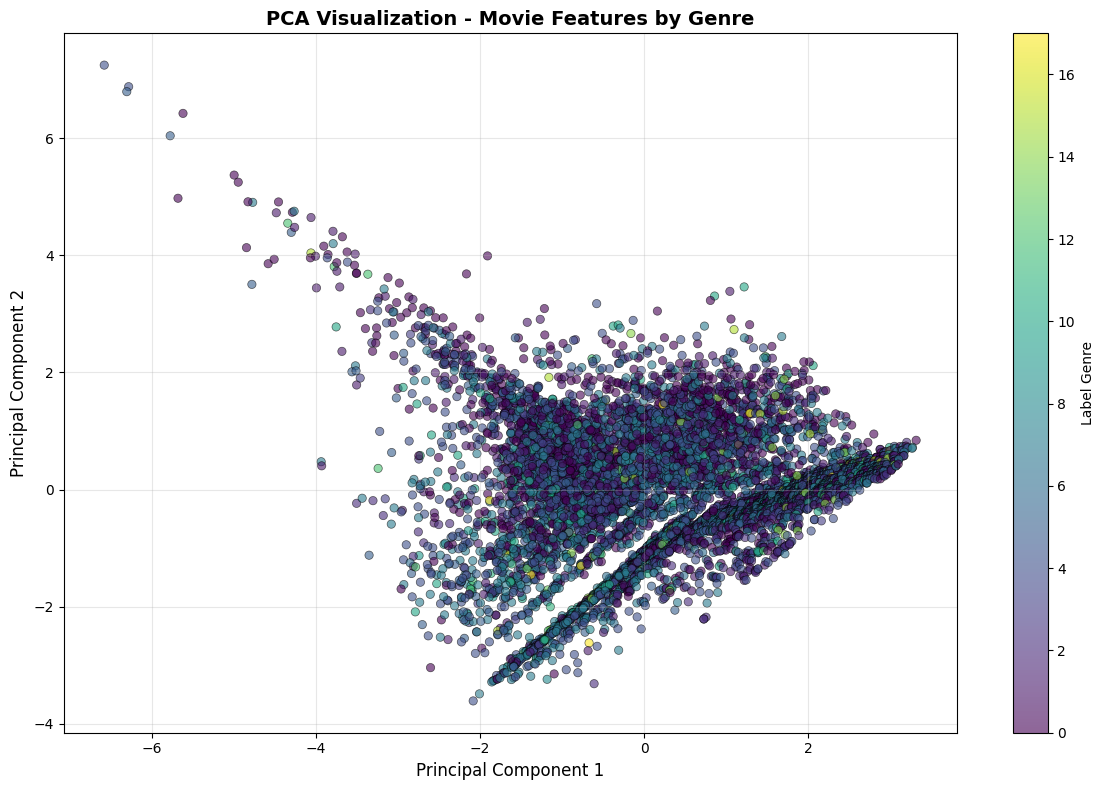

In [ ]:
from sklearn.calibration import LabelEncoder
import os
import matplotlib.pyplot as plt


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['label_genre'])

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_encoded, cmap='viridis',
                     alpha=0.6, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Label Genre')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('PCA Visualization - Movie Features by Genre', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "pca_plot.png"), dpi=200)
print("\n✓ Đã lưu biểu đồ PCA vào: ../etl/reports/pca_plot.png")
plt.show()
